In [3]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import numpy as np
import random
import math
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

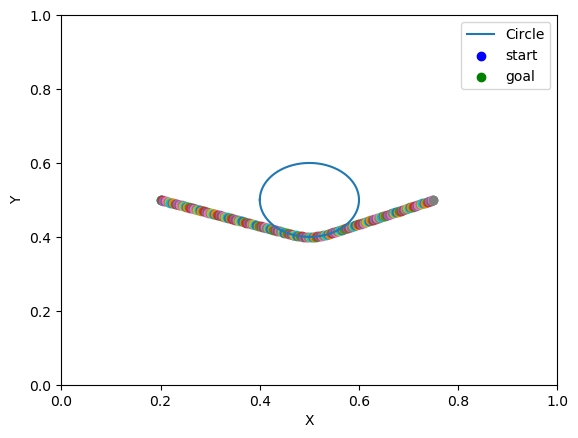

In [23]:
# Define the range of the initial state of the rope
start = (0.2, 0.5)
goal = (0.75, 0.5)

obstacle = (0.5, 0.5)
radius = 0.1

move_base = 0.003

def closest_tangent_point(point, direction='right'):
    angle_radians = math.radians(0)
    X = obstacle[0]
    Y = obstacle[1]
    # tarngent pos
    x = point[0]
    y = point[1]

    distance = math.sqrt((X - x)**2 + (Y - y)**2)
    theta = math.acos(radius / distance)
    theta_a = math.pi/2 - theta
    d = math.sqrt(distance**2 - radius**2)
    if direction == 'right':
        theta_b = angle_radians - theta_a
        T1_x = x + d * math.cos(theta_b)
        T1_y = y + d * math.sin(theta_b)
    else:
        theta_b = angle_radians + theta_a
        T1_x = x - d * math.cos(theta_b)
        T1_y = y - d * math.sin(theta_b)
    length = math.sqrt((T1_x-point[0])**2+(T1_y-point[1])**2)
    num_points = int(length / move_base)
    
    if T1_x > x:
        points_list = [point]
        x = point[0]
        y = point[1]
        dx = (T1_x - point[0])/num_points
        dy = (T1_y - point[1])/num_points
        for _ in range(num_points):
            x += dx
            y += dy
            points_list.append((x, y))
    else:
        points_list = []
        x = copy.copy(T1_x)
        y = copy.copy(T1_y)
        dx = (point[0] - T1_x)/num_points
        dy = (point[1] - T1_y)/num_points
        for _ in range(num_points):
            x += dx
            y += dy
            points_list.append((x, y))

    return (T1_x, T1_y), points_list

def on_circle(start_tangent_point, goal_tangent_point):
    angle1 = math.atan2(start_tangent_point[1] - obstacle[1], start_tangent_point[0] - obstacle[0])
    angle2 = math.atan2(goal_tangent_point[1] - obstacle[1], goal_tangent_point[0] - obstacle[0])
    delta_angle = angle2 - angle1

    if abs(delta_angle) > math.pi:
        delta_angle += math.copysign(2 * math.pi, -delta_angle)
    
    if delta_angle > 0 and obstacle[1] < 0.5:
        delta_angle -= 2 * math.pi
    if delta_angle < 0 and obstacle[1] > 0.5:
        delta_angle += 2 * math.pi
    
    arc_length = abs(radius * delta_angle)
    points_num = int(arc_length / move_base)
    points_on_arc = []

    for t in np.linspace(0, delta_angle, points_num):
        x_on_arc = obstacle[0] + radius * math.cos(angle1 + t)
        y_on_arc = obstacle[1] + radius * math.sin(angle1 + t)
        points_on_arc.append((x_on_arc, y_on_arc))
    return points_on_arc, arc_length

def visualize_goal_state(start_tangent_point, goal_tangent_point, start_points_list):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Visualize the sampled point and the circle
    theta = np.linspace(-math.pi, math.pi, 100)
    circle_x = obstacle[0] + radius * np.cos(theta)
    circle_y = obstacle[1] + radius * np.sin(theta)
    plt.plot(circle_x, circle_y, label='Circle')
    ax.scatter(start_tangent_point[0], start_tangent_point[1])
    ax.scatter(goal_tangent_point[0], goal_tangent_point[1])

    ax.scatter(start[0], start[1], c='blue', label='start')
    ax.scatter(goal[0], goal[1], c='green', label='goal')

    for point in start_points_list:
        ax.scatter(point[0], point[1])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(0., 1)
    ax.set_ylim(0., 1)

    plt.legend()
    plt.show()

start_tangent_point, start_points_list = closest_tangent_point(start)
goal_tangent_point, goal_points_list = closest_tangent_point(goal, 'left')
points_on_arc, arc_length = on_circle(start_tangent_point, goal_tangent_point)
start_points_list.extend(points_on_arc)
start_points_list.extend(goal_points_list)
points_path = np.array(start_points_list)
# up_move = np.array([[0, 0.5, 0]]*5)
actions = np.diff(points_path, axis=0)
actions = np.insert(actions, 1, 0, axis=1)
# actions = np.concatenate([up_move, actions])
np.save('/root/ExPCP/policy/pbm/output/pinch_actions/actions.npy', actions)

visualize_goal_state(start_tangent_point, goal_tangent_point, start_points_list)


In [24]:
actions.shape

(195, 3)

In [17]:
actions

array([[ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-01,  0.00000000e+00],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00, -6.73435030e-03],
       [ 1.90476190e-02,  0.00000000e+00

In [123]:
actions.shape

(28, 2)

In [67]:
arc_length

0.08230336921349768